In [1]:
import numpy as np
import scipy
from scipy.ndimage import gaussian_filter1d
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'
%matplotlib inline
import seaborn as sns

import sys,os,pdb,copy,pickle
from importlib import reload
import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp
import database
db = database.db

import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf
import pingouin as pg
import trial_correlates as tc
import tqdm
import misc

import switch_analysis_one_session as saos
reload(saos)

reload(misc)

from collections import OrderedDict

from scipy.spatial.distance import pdist, squareform, dice

67 sessions!
67 sessions!


In [122]:
db_sorted = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)
ii=1
data_dir_full = db_sorted['data_dir_full'][ii]
ani = db_sorted.index[ii][0]#'e15_13f1'#'e13_26m1'
sess=db_sorted['sess_name'][ii]#'e15_13f1_220117'#'e13_26m1_210913'
print(sess)

e15_13f1_220117


In [3]:
%%time
reload(pf)
place_field_res_l = OrderedDict()
for ii in tqdm.tqdm(range(len(db_sorted['data_dir_full']))):
    ddf = db_sorted['data_dir_full'][ii]
    pf_res =pf.field_detection_both_avg_trial_wrapper(ddf, dosave=True,force_reload=False,nbins = 100, 
                                        save_fn = 'place_field_avg_and_trial_vthresh.p', 
                                        shuffle_fn='fr_map_null_trialtype_vthresh.p',
                                        smth_in_bin=2.5, speed_thresh=1.,speed_key='v',load_only=True
                                        )
    ani = db_sorted.iloc[ii]['animal_name.1']
    sess = db_sorted.iloc[ii]['sess_name']
    place_field_res_l[ani,sess] = pf_res
    

  1%|▏         | 1/67 [00:00<00:13,  4.93it/s]

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


  6%|▌         | 4/67 [00:00<00:09,  6.90it/s]

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 10%|█         | 7/67 [00:00<00:06,  8.97it/s]

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220120/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211019/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210328/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 13%|█▎        | 9/67 [00:00<00:05, 11.49it/s]

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211116/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211213/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210111/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 16%|█▋        | 11/67 [00:01<00:04, 12.19it/s]

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211212/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211211/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 19%|█▉        | 13/67 [00:01<00:05, 10.09it/s]

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210203/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 22%|██▏       | 15/67 [00:05<00:41,  1.24it/s]

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211210/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211119/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 25%|██▌       | 17/67 [00:08<00:45,  1.10it/s]

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211124/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210201/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 30%|██▉       | 20/67 [00:08<00:27,  1.71it/s]

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210331/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210119/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210302/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 37%|███▋      | 25/67 [00:08<00:13,  3.12it/s]

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210317/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210312/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200809/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 43%|████▎     | 29/67 [00:09<00:07,  5.03it/s]

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200809/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200812/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210314/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200729/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 51%|█████     | 34/67 [00:09<00:04,  8.18it/s]

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210319/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210315/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210322/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_201002/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 57%|█████▋    | 38/67 [00:09<00:02, 11.41it/s]

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200723/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_201004/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200716/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200920/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 61%|██████    | 41/67 [00:09<00:01, 13.79it/s]

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200723/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201129/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201125/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 69%|██████▊   | 46/67 [00:10<00:01, 13.41it/s]

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_2m1/e16_2m1_201129/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_2m1/e16_2m1_201206/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200917/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200918/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 75%|███████▍  | 50/67 [00:10<00:01, 14.32it/s]

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200919/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200719/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201208/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201206/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 82%|████████▏ | 55/67 [00:11<00:01, 10.39it/s]

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200923/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200720/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_2m1/e16_2m1_201121/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


 88%|████████▊ | 59/67 [00:11<00:00, 13.02it/s]

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_201001/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200717/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200715/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201121/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


100%|██████████| 67/67 [00:12<00:00,  5.50it/s]

/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200823/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200824/py_data/place_field_avg_and_trial_vthresh.p exists; loading---
CPU times: user 695 ms, sys: 170 ms, total: 865 ms
Wall time: 12.2 s


In [4]:
# load switch detection result
res_to_save_data_detection_l = pickle.load(open(os.path.join('/mnt/home/szheng/ceph/place_variability/data','switch_res_allromsess_highrepeats_swmag0dot4.p'),'rb'))

sess_selected = db_sorted.loc[db_sorted['n_pyr_putative'] >= 50,'sess_name']

switch_detection_res_allsess = {}
# for detection in ['avg','trial_filter']:
for detection in ['avg']:
    switch_detection_res_allsess[detection]={}
    for key in ['sig','cdf','changes_df']:
        switch_detection_res_allsess[detection][key] = pd.concat({k:val[detection][key] if val is not None else None for k,val in res_to_save_data_detection_l.items()},axis=0)
        switch_detection_res_allsess[detection][key] = switch_detection_res_allsess[detection][key].loc[(slice(None),sess_selected.values),:]
        
    switch_detection_res_allsess[detection]['sig_pos'] = switch_detection_res_allsess[detection]['sig'] * (switch_detection_res_allsess[detection]['cdf'] > 0.95)
    
    


/tmp/ipykernel_310198/3306167154.py:12: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  switch_detection_res_allsess[detection][key] = switch_detection_res_allsess[detection][key].loc[(slice(None),sess_selected.values),:]
/tmp/ipykernel_310198/3306167154.py:12: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  switch_detection_res_allsess[detection][key] = switch_detection_res_allsess[detection][key].loc[(slice(None),sess_selected.values),:

In [110]:
# load data
mat_to_return=prep.load_stuff(data_dir_full,sessionPulses = '*SessionPulses.Events.mat',filtered='*thetaFiltered*.mat')
# sessionPulses=mat_to_return['sessionPulses']
# filtered = mat_to_return['filtered']
# behavior=mat_to_return['behavior']
ripples = mat_to_return['ripples']


prep_res = dpp.load_spk_beh_df(data_dir_full,force_reload=False,extra_load={})
# spk_beh_df=prep_res['spk_beh_df']
cell_cols_d = prep_res['cell_cols_d']
# beh_df = prep_res['beh_df'].as_dataframe()
# beh_df_d,beh_df=dpp.group_into_trialtype(beh_df)
# spike_trains = prep_res['spike_trains']

load *SessionPulses.Events.mat failed


In [102]:
ripples = mat_to_return['ripples']
ripple_events = ripples

cell_metrics=mat_to_return.cell_metrics
mergepoints = mat_to_return.mergepoints

cell_type_mask=mat_to_return['cell_type_mask']

In [103]:
%%time
spike_times = cell_metrics.spikes.times
ripple_events_timestamps = ripple_events.timestamps


participation_mask_l_d_epochs=[]
ripple_time_ints_l_d_epochs=[]
for selected_interval in mergepoints.timestamps:
# selected_interval = mergepoints.timestamps[0]
    spike_times_in_ripple_l_d,mask_l_d, ripple_time_ints_l_d = {},{},{}
    for k,win in zip(['ripple_only','extended'],[None,[-0.2,0.1]]):
        spike_times_in_ripple_l_d[k], mask_l_d[k], ripple_time_ints_l_d[k] = prep.get_spike_times_in_ripple_l(spike_times,ripple_events_timestamps,selected_interval,ripple_window_extension=win,cell_type_mask=cell_type_mask)
        mask_l_d[k] = np.array(mask_l_d[k])


    rank_l_d,participation_mask_l_d = {},{}
    for k,stirl in spike_times_in_ripple_l_d.items():
        rank_l_d[k],participation_mask_l_d[k] = prep.get_first_spike_rank_all_ripples(stirl)
    participation_mask_l_d_epochs.append(participation_mask_l_d)
    ripple_time_ints_l_d_epochs.append(ripple_time_ints_l_d)

CPU times: user 2min 22s, sys: 5.45 s, total: 2min 27s
Wall time: 2min 27s


In [140]:
ripple_time_ints_l_d_epochs

[{'ripple_only': array([[  73.208 ,   73.292 ],
         [ 179.0328,  179.0568],
         [ 184.1408,  184.1672],
         ...,
         [6567.7096, 6567.7512],
         [6568.1816, 6568.2056],
         [6570.9896, 6571.0248]]),
  'extended': array([[  73.008 ,   73.392 ],
         [ 178.8328,  179.1568],
         [ 183.9408,  184.2672],
         ...,
         [6567.5096, 6567.8512],
         [6567.9816, 6568.3056],
         [6570.7896, 6571.1248]])},
 {'ripple_only': array([[7209.108 , 7209.1352],
         [7400.0904, 7400.128 ],
         [7443.656 , 7443.692 ],
         [7471.0896, 7471.1136],
         [7568.3056, 7568.34  ],
         [7568.6912, 7568.7112],
         [7570.5752, 7570.6168],
         [7787.8256, 7787.8968],
         [7846.5448, 7846.5696],
         [7851.1616, 7851.196 ],
         [7885.    , 7885.0232],
         [7886.2352, 7886.2808],
         [7936.6312, 7936.656 ],
         [7942.9096, 7942.9352],
         [8089.7632, 8089.7864],
         [8095.0632, 8095.0888],
 

In [148]:
sim_df_l = []
for participation_mask_l_d in participation_mask_l_d_epochs:
    dist = pdist(participation_mask_l_d['ripple_only'].T,metric=dice)
    sim = 1 - squareform(dist)
    sim_df = pd.DataFrame(sim,index=cell_cols_d['pyr'].astype(int),columns=cell_cols_d['pyr'].astype(int))
    sim_df_l.append(sim_df)

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/spatial/distance.py:1424: RuntimeWarning: invalid value encountered in true_divide
  return float((ntf + nft) / np.array(2.0 * ntt + ntf + nft))
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/spatial/distance.py:1424: RuntimeWarning: invalid value encountered in true_divide
  return float((ntf + nft) / np.array(2.0 * ntt + ntf + nft))


In [219]:
sys.path.append('../util_code/hpc')
import get_ripple_time_participation_cofiring as grtpc
reload(grtpc)

<module 'get_ripple_time_participation_cofiring' from '/mnt/home/szheng/projects/place_variability/../util_code/hpc/get_ripple_time_participation_cofiring.py'>

In [212]:
reload(prep)

<module 'preprocess' from '/mnt/home/szheng/projects/seq_detection2/code/preprocess.py'>

In [220]:
grtpc.main(0)

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/spatial/distance.py:1424: RuntimeWarning: invalid value encountered in true_divide
  return float((ntf + nft) / np.array(2.0 * ntt + ntf + nft))
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/spatial/distance.py:1424: RuntimeWarning: invalid value encountered in true_divide
  return float((ntf + nft) / np.array(2.0 * ntt + ntf + nft))


saved at /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/ripple_time_participation_cofiring.p


# pairwise regressors and target preparation

In [13]:
import change_point_rsa as cpr

In [183]:
# get coswitching
task_ind,trial_type=(0,0)
onoff_outer_d = {}
changes_shuffle_d = {}

task_ind = 0
trial_type = 1

fr_df = place_field_res_l[ani,sess]['avg']['params'][task_ind,trial_type].loc['fr_mean']
fr_df_shuffle = cpa.gen_circular_shuffle(fr_df,500)
fr_corr = fr_df.T.corr()

for sw_type in ['raw',0.3]:
    one_ind =(ani,sess,task_ind,trial_type,sw_type,'switch_magnitude',0.4)
    changes_df = switch_detection_res_allsess[detection]['changes_df'].loc[one_ind]
    
    # inds_d = cpa.get_inds_switch_sametrial_sorted(changes_df)
    changes_shuffle_d[sw_type] = cpa.gen_circular_shuffle(changes_df.dropna(axis=1),500)
    
    
    
    _,_,_,_,_,onoff_outer=cpa.get_shared_onoff(changes_df,return_outer=True)
    onoff_outer_d[sw_type] = onoff_outer

/tmp/ipykernel_310198/3561453620.py:15: PerformanceWarning: indexing past lexsort depth may impact performance.
  changes_df = switch_detection_res_allsess[detection]['changes_df'].loc[one_ind]


In [184]:
# pairwise correlation
fr_df = place_field_res_l[ani,sess]['avg']['params'][task_ind,trial_type].loc['fr_mean']
# fr_df_shuffle = cpa.gen_circular_shuffle(fr_df,500)
fr_corr = fr_df.T.corr()

In [185]:
# get pairwise com distance
com_dist_thresh = 2 
com_all_fields=place_field_res_l[ani,sess]['avg']['all_fields'][task_ind,trial_type]['com']
pairwise_com_dist = np.abs(np.subtract.outer(com_all_fields.values,com_all_fields.values))
pairwise_com_dist = pd.DataFrame(pairwise_com_dist,index=com_all_fields.index,columns=com_all_fields.index)
dist_thresh_mask = pairwise_com_dist < com_dist_thresh
# dist_thresh_mask = pd.DataFrame(dist_thresh_mask,index=com_all_fields.index,columns=com_all_fields.index)

In [186]:
# get pairwise field overlap
all_field_bounds = place_field_res_l[ani,sess]['avg']['all_fields'][task_ind,trial_type][['start','end']]
pairwise_field_overlap,pairwise_field_overlap_ratio_width_sum = cpr.get_pairwise_field_overlap(all_field_bounds)

In [187]:
# process all pairwise field matrices, turn into a flattened vector of the upper triag, after reducing fields to neuron
pen = 'raw'#0.3
regressor_pairwise_mat_d = {'com_dist':pairwise_com_dist,'com_dist_mask':dist_thresh_mask,'fr_corr':fr_corr,'overlap':pairwise_field_overlap,'overlap_ratio':pairwise_field_overlap_ratio_width_sum}
pen_name_d = {'raw':'raw',0.3:'cpd'}
for pen in ['raw',0.3]:
    pairwise_onoff = onoff_outer_d[pen]
    pen_name = pen_name_d[pen]
    regressor_pairwise_mat_d.update({f'coswitch_on_{pen_name}':pairwise_onoff[1],f'coswitch_off_{pen_name}':pairwise_onoff[-1]})

regressor_reduced_flatten_d = {}

for k,mat in regressor_pairwise_mat_d.items():
    regressor_reduced_flatten_d[k],neurons_left,_,_ = cpr.reduce_get_triu_flatten(mat,mask = None) # neurons_left should be the same for all these






In [188]:
# flatten ripple cofiring similarities
sim_df_reduced_flatten_l = []
for sim_df in sim_df_l:
    sim_df_reduced_flatten,_,_,_ = cpr.reduce_get_triu_flatten(sim_df.loc[neurons_left,neurons_left],mask = None)
    sim_df_reduced_flatten_l.append(sim_df_reduced_flatten)


post_minus_pre_in_sim = sim_df_reduced_flatten_l[2]-sim_df_reduced_flatten_l[0]

In [181]:
reload(prep)

<module 'preprocess' from '/mnt/home/szheng/projects/seq_detection2/code/preprocess.py'>

In [189]:
reg_mat = pd.DataFrame(regressor_reduced_flatten_d)
reg_mat['sim_diff'] = post_minus_pre_in_sim

# actual regression!

In [151]:
import statsmodels
from statsmodels.tools.tools import add_constant
import statsmodels.formula.api as smf

In [152]:
from statsmodels.nonparametric.smoothers_lowess import lowess

In [164]:
overlap_key = 'overlap_ratio'#'overlap'#com_dist
# y_hat = lowess(reg_mat['sim_diff'],reg_mat[overlap_key],return_sorted=False)
# reg_mat['resid'] = reg_mat['sim_diff']-y_hat_lowess

model=smf.ols(f'sim_diff~{overlap_key}',data=reg_mat)
res=model.fit()
print(res.summary())
y_hat = res.predict()
reg_mat['resid']=res.resid

                            OLS Regression Results                            
Dep. Variable:               sim_diff   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     621.9
Date:                Thu, 08 Dec 2022   Prob (F-statistic):          1.18e-135
Time:                        15:28:51   Log-Likelihood:                 41151.
No. Observations:               25651   AIC:                        -8.230e+04
Df Residuals:                   25649   BIC:                        -8.228e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0046      0.000     12.128

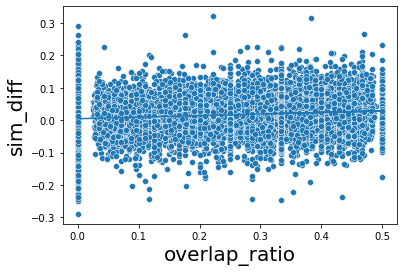

In [154]:
ax=sns.scatterplot(data=reg_mat,x=overlap_key,y='sim_diff')
ax.plot(reg_mat[overlap_key],y_hat)
# sns.regplot(data=reg_mat,x=overlap_key,y='sim_diff',scatter_kws={'alpha':0.1})

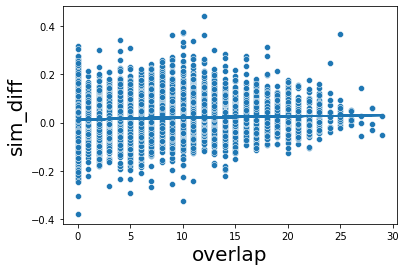

In [64]:
ax=sns.scatterplot(data=reg_mat,x=overlap_key,y='sim_diff')
ax.plot(reg_mat[overlap_key],y_hat_lowess)

<AxesSubplot:xlabel='overlap_ratio', ylabel='sim_diff'>

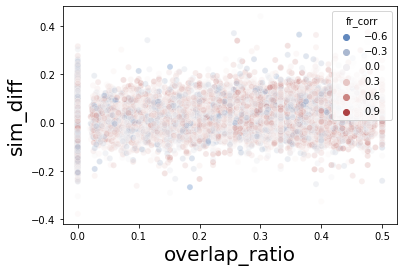

In [110]:
%matplotlib inline
sns.scatterplot(data=reg_mat,x=overlap_key,y='sim_diff',hue='fr_corr',alpha=0.3,palette='vlag')

<AxesSubplot:xlabel='fr_corr', ylabel='sim_diff'>

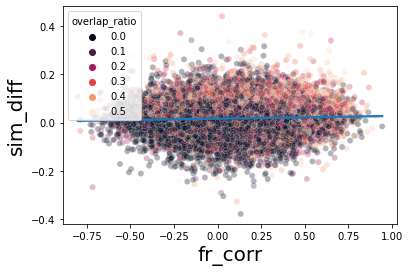

In [111]:
ax=sns.scatterplot(data=reg_mat,x='fr_corr',y='sim_diff',hue=overlap_key,alpha=0.3,palette='rocket')
sns.regplot(data=reg_mat,x='fr_corr',y='sim_diff',scatter=False,ax=ax)

<AxesSubplot:xlabel='coswitch_on_cpd', ylabel='sim_diff'>

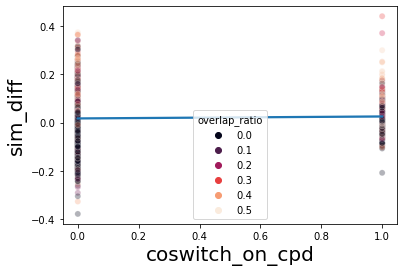

In [112]:
ax=sns.scatterplot(data=reg_mat,x='coswitch_on_cpd',y='sim_diff',hue=overlap_key,alpha=0.3,palette='rocket')
sns.regplot(data=reg_mat,x='coswitch_on_cpd',y='sim_diff',scatter=False,ax=ax)

<AxesSubplot:xlabel='coswitch_on_raw', ylabel='sim_diff'>

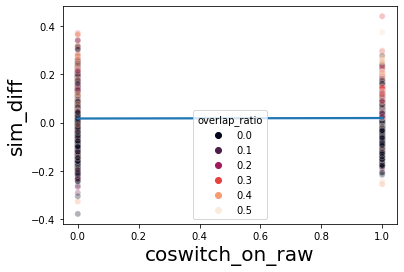

In [114]:
ax=sns.scatterplot(data=reg_mat,x='coswitch_on_raw',y='sim_diff',hue=overlap_key,alpha=0.3,palette='rocket')
sns.regplot(data=reg_mat,x='coswitch_on_raw',y='sim_diff',scatter=False,ax=ax)

<AxesSubplot:xlabel='overlap_ratio', ylabel='sim_diff'>

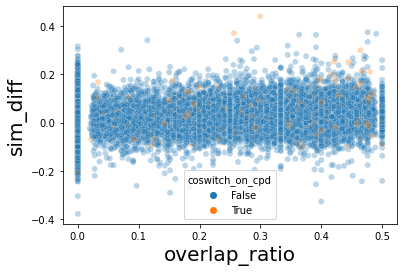

In [117]:
sns.scatterplot(data=reg_mat,x=overlap_key,y='sim_diff',hue='coswitch_on_cpd',alpha=0.3)

In [45]:
# model = smf.ols('sim_diff~com_dist',data=reg_mat)
# res=model.fit()
# print(res.summary())

# reg_mat['resid'] = res.resid

                            OLS Regression Results                            
Dep. Variable:               sim_diff   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     22.57
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           2.03e-06
Time:                        21:44:02   Log-Likelihood:                 52562.
No. Observations:               34453   AIC:                        -1.051e+05
Df Residuals:                   34451   BIC:                        -1.051e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0149      0.001     23.710      0.0

In [20]:
import pingouin as pg

In [165]:
reg_mat.rcorr()

,com_dist,com_dist_mask,fr_corr,overlap,overlap_ratio,coswitch_on_raw,coswitch_off_raw,coswitch_on_cpd,coswitch_off_cpd,sim_diff,resid
com_dist,-,,***,***,***,***,***,***,***,**,
com_dist_mask,-0.005,-,***,***,***,***,***,***,***,***,*
fr_corr,0.163,0.118,-,***,***,***,***,***,***,***,**
overlap,-0.133,0.445,0.188,-,***,***,***,*,,***,**
overlap_ratio,-0.106,0.578,0.194,0.916,-,***,***,***,*,***,
coswitch_on_raw,0.196,0.105,0.376,0.096,0.137,-,***,***,***,***,**
coswitch_off_raw,0.199,0.123,0.309,0.107,0.154,0.31,-,***,***,***,
coswitch_on_cpd,0.048,0.051,0.184,0.015,0.042,0.186,0.071,-,***,,
coswitch_off_cpd,0.051,0.022,0.119,-0.004,0.016,0.046,0.153,0.106,-,,
sim_diff,-0.02,0.075,0.048,0.161,0.154,0.04,0.032,0.006,0.005,-,***


In [166]:
# model = smf.ols('resid~C(coswitch_on_cpd)+C(coswitch_off_cpd)+C(coswitch_on_raw)+C(coswitch_off_raw)+fr_corr',data=reg_mat)
model = smf.ols('resid~fr_corr',data=reg_mat)
res=model.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:                  resid   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     8.546
Date:                Thu, 08 Dec 2022   Prob (F-statistic):            0.00347
Time:                        15:30:59   Log-Likelihood:                 41155.
No. Observations:               25651   AIC:                        -8.231e+04
Df Residuals:                   25649   BIC:                        -8.229e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0006      0.000     -1.543      0.1

In [167]:
# model = smf.ols('resid~C(coswitch_on_cpd)+C(coswitch_off_cpd)+C(coswitch_on_raw)+C(coswitch_off_raw)+fr_corr',data=reg_mat)
model = smf.ols('resid~C(coswitch_on_cpd)+C(coswitch_off_cpd)',data=reg_mat)
res=model.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:                  resid   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.06395
Date:                Thu, 08 Dec 2022   Prob (F-statistic):              0.938
Time:                        15:31:21   Log-Likelihood:                 41151.
No. Observations:               25651   AIC:                        -8.230e+04
Df Residuals:                   25648   BIC:                        -8.227e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [168]:
# model = smf.ols('resid~C(coswitch_on_cpd)+C(coswitch_off_cpd)+C(coswitch_on_raw)+C(coswitch_off_raw)+fr_corr',data=reg_mat)
model = smf.ols('resid~C(coswitch_on_raw)+C(coswitch_off_raw)',data=reg_mat)
res=model.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:                  resid   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.909
Date:                Thu, 08 Dec 2022   Prob (F-statistic):            0.00739
Time:                        15:31:26   Log-Likelihood:                 41156.
No. Observations:               25651   AIC:                        -8.231e+04
Df Residuals:                   25648   BIC:                        -8.228e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [169]:
# model = smf.ols('sim_diff~com_dist*C(coswitch_on_cpd)*C(coswitch_off_cpd)',data=reg_mat)
model = smf.ols('sim_diff~com_dist+C(coswitch_on_cpd)+C(coswitch_off_cpd)',data=reg_mat)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               sim_diff   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.918
Date:                Thu, 08 Dec 2022   Prob (F-statistic):            0.00828
Time:                        15:31:37   Log-Likelihood:                 40850.
No. Observations:               25651   AIC:                        -8.169e+04
Df Residuals:                   25647   BIC:                        -8.166e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

# ttest in segments

In [175]:
reload(cpr)
key_to_bin = 'overlap_ratio'
to_test_key='coswitch_on_raw'#'coswitch_on_cpd'#
ttest_res_d, target_grouped_summary= cpr.binned_ttest(reg_mat,key_to_bin,nbins=5,target_key='sim_diff',to_test_key=to_test_key)



In [176]:
ttest_res_d

,t,p_val,bin_start
0,2.258131,0.023951,-0.0005
1,1.831482,0.067164,0.1000
2,0.098244,0.921746,0.2000
3,0.608491,0.542907,0.3000
4,2.392460,0.016835,0.4000


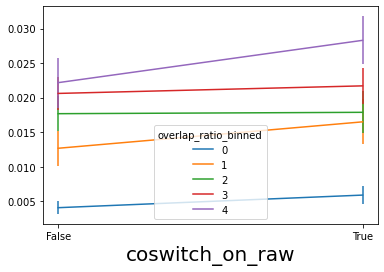

In [177]:
# target_grouped_summary_unstack = groupby_summary.unstack()
%matplotlib inline
ax=target_grouped_summary['mean'].plot(yerr=target_grouped_summary['sem']*1.96)
_=ax.set(xticks=[0,1],xticklabels=target_grouped_summary.index)